In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
origin_data_path = "\\NUS_datasets\\Hand_dataset"
test_img_path = "\\NUS_datasets\\Hand_dataset\\fist\\fist_000.JPG"

In [3]:
def cv2plt(img):
    plt.figure()        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:|
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x000002A954039280>


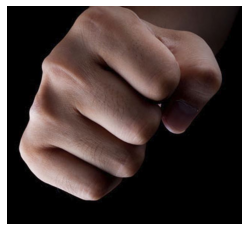

In [4]:
img = cv2.imread(test_img_path)
cv2plt(img)

In [23]:
#在这里设置参数
winSize = (224,224)
blockSize = (32,32)
blockStride = (16,16)
cellSize = (16,16)
nbins = 9

#定义对象hog，同时输入定义的参数，剩下的默认即可
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

In [24]:
# 用以代替循环的方式
from scipy import sqrt
from imutils import paths 
import math
imgPaths        = list(paths.list_images(origin_data_path)) 
# imgPaths
# test_path = '\\NUS_datasets\\Hand_dataset\\fist\\fist_000.JPG'
# test_path.split(os.path.sep)
loop = 0
dat = []
lbl = []
for pth in imgPaths: 
    print("loop: ", loop)
  	# os.path.sep 以路径分隔符分割的list, 跨平台通用
    # ['/NUS_datasets/Hand_dataset', 'fist', 'fist_000.JPG']
    l           = pth.split(os.path.sep)[-2]  
    l           = l.split("/")[-1]
    img         = cv2.imread(pth,0)
    img         = cv2.resize(img,(224,224))
#     img         = sqrt(img)
#     img         = img.astype('uint8')
    #print(img.dtype)
    HOG_feature    = hog.compute(img).reshape((-1,))
    
    dat.append(HOG_feature) 
    lbl.append(l) 
    loop = loop + 1

dat = np.array(dat)
lbl = np.array(lbl)
print(dat.shape)
print(lbl.shape)

loop:  0
loop:  1
loop:  2
loop:  3
loop:  4
loop:  5
loop:  6
loop:  7
loop:  8
loop:  9
loop:  10
loop:  11
loop:  12
loop:  13
loop:  14
loop:  15
loop:  16
loop:  17
loop:  18
loop:  19
loop:  20
loop:  21
loop:  22
loop:  23
loop:  24
loop:  25
loop:  26
loop:  27
loop:  28
loop:  29
loop:  30
loop:  31
loop:  32
loop:  33
loop:  34
loop:  35
loop:  36
loop:  37
loop:  38
loop:  39
loop:  40
loop:  41
loop:  42
loop:  43
loop:  44
loop:  45
loop:  46
loop:  47
loop:  48
loop:  49
loop:  50
loop:  51
loop:  52
loop:  53
loop:  54
loop:  55
loop:  56
loop:  57
loop:  58
loop:  59
loop:  60
loop:  61
loop:  62
loop:  63
loop:  64
loop:  65
loop:  66
loop:  67
loop:  68
loop:  69
loop:  70
loop:  71
loop:  72
loop:  73
loop:  74
loop:  75
loop:  76
loop:  77
loop:  78
loop:  79
loop:  80
loop:  81
loop:  82
loop:  83
loop:  84
loop:  85
loop:  86
loop:  87
loop:  88
loop:  89
loop:  90
loop:  91
loop:  92
loop:  93
loop:  94
loop:  95
loop:  96
loop:  97
loop:  98
loop:  99
loop:  100

In [25]:
from sklearn.preprocessing import LabelEncoder
le      = LabelEncoder()
lbls    = le.fit_transform(lbl)
classes = list(le.classes_)  
classes = [str(c) for c in classes]

print(classes)
print(lbls.shape)
lbls

['fist', 'five', 'gundown', 'gunup', 'one', 'thumbdown', 'thumbleft', 'thumbright', 'thumbup']
(540,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

In [26]:
# shuffle
index = np.arange(lbls.shape[0])
np.random.shuffle(index)
lbls = lbls[index]
dat = dat[index]

print("shuffle all data ")

shuffle all data 


In [37]:
from sklearn.model_selection import train_test_split
'''
	allRecords.shape(21312,8000,1)
	lbls.shape(21312,10)	
'''
(trDat,
 vlDat,
 trLbl, 
 vlLbl) = train_test_split(dat,
               lbls,
               # Make sure the split is applied on each class
               stratify=lbls, 
               test_size=0.3,
               random_state=229,
               shuffle=True)
 
print("The shape of trDat is", trDat.shape)
print("The shape of vlDat is", vlDat.shape)

The shape of trDat is (378, 6084)
The shape of vlDat is (162, 6084)


([<matplotlib.axis.XTick at 0x2a9549a5eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

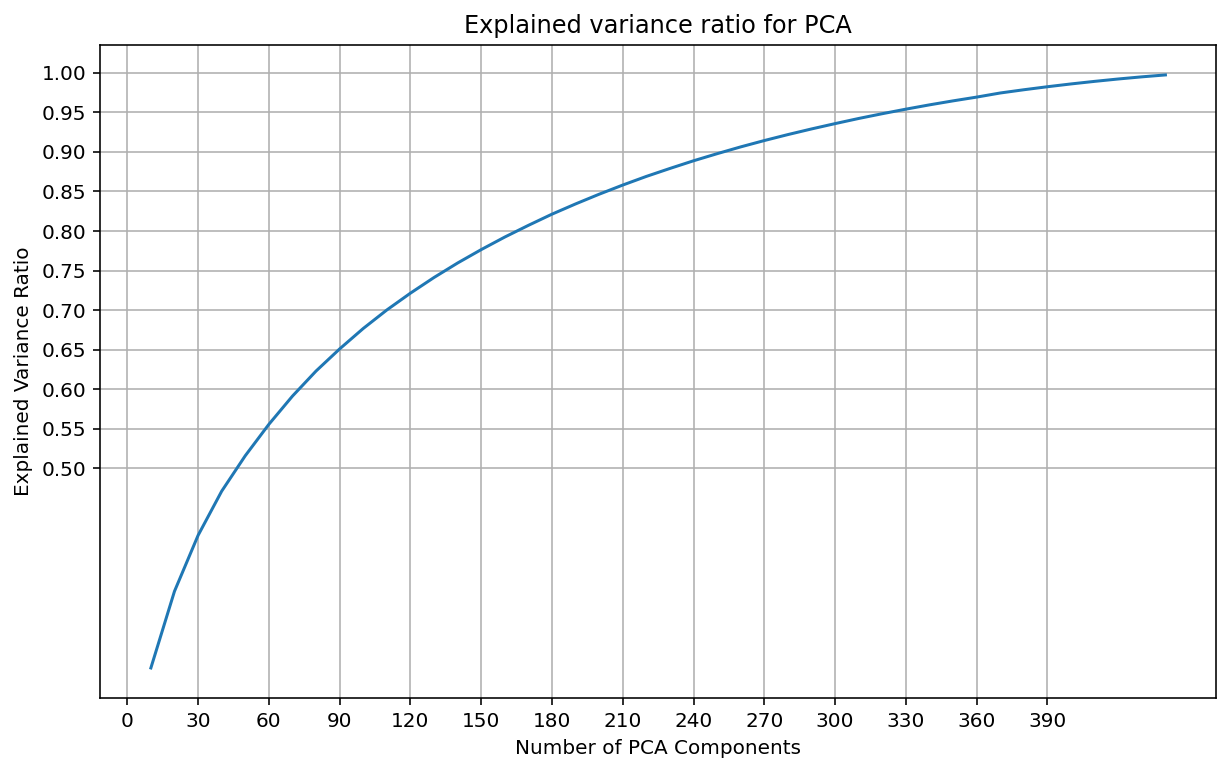

In [31]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
candidate_components = range(10,450,10)
explained_ratios =[]

for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(trDat)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure(figsize=(10,6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5,1.05,.05))
plt.xticks(np.arange(0,400,30))

In [32]:
# 选择310个主成分 还原率保证大于95%
pca = PCA(n_components=330)
X_pca = pca.fit_transform(trDat)
X_pca.shape

(459, 330)

In [38]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

svm_model = svm.SVC(kernel = 'linear', C = 2,decision_function_shape='ovo').fit(trDat,trLbl)

y_pred = svm_model.predict(vlDat)
# validation = pca.transform(vlDat)
# y_pred = svm_model.predict(validation)

print(confusion_matrix(vlLbl, y_pred))

print("train score:",svm_model.score(trDat,trLbl))
print("test score:",svm_model.score(vlDat,vlLbl))

[[10  2  0  0  1  0  2  1  2]
 [ 0 15  0  1  1  0  0  0  1]
 [ 2  0 14  1  0  1  0  0  0]
 [ 0  2  1 11  3  0  1  0  0]
 [ 2  0  0  3 10  0  0  1  2]
 [ 0  0  0  0  1 11  4  2  0]
 [ 1  0  1  0  0  3 11  0  2]
 [ 1  1  1  0  2  4  0  9  0]
 [ 0  0  0  1  2  0  0  0 15]]
train score: 1.0
test score: 0.654320987654321


In [39]:
import joblib
svm_model = svm.SVC(kernel = 'linear', C = 5,decision_function_shape='ovo').fit(dat,lbls)
joblib.dump(svm_model, "train_model.m")

['train_model.m']

In [33]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

svm_model = svm.SVC(kernel = 'rbf', C = 2,decision_function_shape='ovo').fit(X_pca,trLbl)

validation = pca.transform(vlDat)
y_pred = svm_model.predict(validation)

print(confusion_matrix(vlLbl, y_pred))

print("train score:",svm_model.score(X_pca,trLbl))
print("test score:",svm_model.score(validation,vlLbl))

[[5 1 0 0 0 1 2 0 0]
 [0 9 0 0 0 0 0 0 0]
 [0 1 8 0 0 0 0 0 0]
 [0 2 0 5 1 0 1 0 0]
 [0 0 1 0 3 1 0 0 4]
 [0 0 1 0 0 6 0 0 2]
 [1 0 1 0 0 3 4 0 0]
 [0 1 0 0 0 4 1 3 0]
 [0 0 0 0 1 0 2 0 6]]
train score: 1.0
test score: 0.6049382716049383


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

parameters={'C':np.linspace(0.1,20,50),'gamma':np.linspace(0.1,20,20)}
svc = svm.SVC(kernel='linear',decision_function_shape='ovo')
model = GridSearchCV(svc,parameters,cv=5,scoring='accuracy',verbose=3)
model.fit(trDat,trLbl)
print(model.best_params_,model.best_score_)

model.score(vlDat,vlLbl)
y_pred = model.predict(vlDat)
print(model.score(dat,lbls))
print(classification_report(vlLbl, y_pred))
print(confusion_matrix(vlLbl, y_pred))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.657 total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.657 total time=   0.7s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.566 total time=   0.7s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.7s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.643 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.657 total time=   0.7s
[CV 2/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.657 total time=   0.6s
[CV 3/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.566 total time=   0.7s
[CV 4/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.633 total time=   0.7s
[CV 5/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.643 total time=   0.7s
[CV 1/5] END ....C=0.1, gamma=2.194736842105263;, score=0.657 total time=   0.7s
[CV 2/5] END ....C=0.1, gamma=2.194736842105

NameError: name 'classification_report' is not defined

In [15]:
from sklearn.metrics import classification_report
print(classification_report(vlLbl, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         6
           1       0.67      0.67      0.67         6
           2       0.71      0.83      0.77         6
           3       1.00      0.50      0.67         6
           4       0.50      0.50      0.50         6
           5       1.00      1.00      1.00         1
           6       0.83      0.83      0.83         6
           7       0.75      0.50      0.60         6
           8       0.67      0.33      0.44         6
           9       0.56      0.83      0.67         6

    accuracy                           0.64        55
   macro avg       0.71      0.67      0.66        55
weighted avg       0.68      0.64      0.63        55

